In [2]:
import numpy as np
import pandas as pd
import time
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.__version__
%matplotlib inline

def by_cuts(df, col):
    df['col2'] = pd.cut(df[col], bins=[0, 10, 50, float('Inf')], labels=['xxx', 'yyy', 'zzz'])
    return time.clock() - start_time 

def by_where(df, col):
    df['col2'] = np.where((df[col] > 0) & (df[col]<= 10), 'xxx', np.where((df[col] > 10) & (df[col]<= 50), 'yyy', 'zzz'))
    return time.clock() - start_time

def by_loc_condition(df, col):
    df.loc[(df[col] > 0) & (df[col]<= 10), 'col2'] = 'xxx'
    df.loc[(df[col] > 10) & (df[col]<= 50), 'col2'] = 'yyy'
    df.loc[df[col] > 50, 'col2'] = 'zzz'
    return time.clock() - start_time

def by_apply(df, col):
    def func(x):
        if 0 < x <= 10:
            return 'xxx'
        elif 10 < x <= 50:
            return 'yyy'
        return 'zzz'
    df['col2'] = df[col].apply(func)
    return time.clock() - start_time

def by_map(df, col):
    def func(x):
        if 0 < x <= 10:
            return 'xxx'
        elif 10 < x <= 50:
            return 'yyy'
        return 'zzz'
    d = {range(1, 10): "xxx", range(11, 50): "yyy", range(50, 100): "xxx"}
    df['col2'] = df[col].map(func)
    return time.clock() - start_time

def by_select_between(df, col):
    criteria = [df[col].between(1, 10), df[col].between(11, 50), df[col].between(51, 100)]
    values = ["xxx", "yyy", "zzz"]
    df['col2'] = np.select(criteria, values, 0)
    return time.clock() - start_time

def by_select_isin(df, col):
    criteria = [df[col].isin(range(1, 10)), df[col].isin(range(11, 50)), df[col].isin(range(50, 100))]
    values = ["xxx", "yyy", "zzz"]
    df['col2'] = np.select(criteria, values, 0)
    return time.clock() - start_time



# Setup parameters
attempts = 1
df_size_multiplicators = [1, 5, 10, 25, 50, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 100000, 1000000] #, 10000, 1000000] # 10 integers * ?
methods_used = [by_cuts, by_where, by_apply, by_map, by_loc_condition]
evaluation = 'best_of' # later. 

# Inner parameters:
col_names = [fnct.__name__ for fnct in methods_used]
tokens = 1
lst = [11,40,4,5,26,66,33,26,82,97] # Yes, specific to function, but I need rethink here
dataframe_sizes = [lst*m for m in df_size_multiplicators]
state_before = pd.DataFrame({'col1':lst})

# InfoL
print("\n\nTime took by different methods to remap vals to second column:")
attempts_data = []
for attempt in range(attempts):
    showDF = pd.DataFrame(columns=col_names)
    
    for size in dataframe_sizes:
        timings = []
        for i, fnct in enumerate(methods_used):
            frame = pd.DataFrame({'col1': size})
            start_time = time.clock() 
            it_took = fnct(frame, 'col1')
            fctn_name = col_names[i]
            timings.append(it_took)
            
        timings = [ np.asarray(timings) ]
        showDF = showDF.append( pd.DataFrame(timings, columns=col_names, index=[len(size)]))
        if tokens > 0:
            state_after = frame
            tokens -=1 
            
    showDF.index.name = "Number of rows in DataFrame"
    attempts_data.append(showDF)
    print("\n\nAttempt", attempt+1, "timings:")
    display(showDF)

    
print("\n\nExplainer on fraction of df:\n 1. State before applying speed test functions:")
display(state_before)
print("\n\n2. State after applying speed tested function:")
display(state_after)

####
# ll code it later n stuff
#evaluation_method = 'avrg' # avrg / best_of / worst_of
# showDF = attempts_data[0]
# display(showDF)
# other_attempts = attempts_data[1:]
# if other_attempts:
#     if evaluation_method is 'avrg':
#         showDF = [((showDF * attempt.values)/attempts) for attempt in other_attempts]
#     elif evaluation_method is 'best_of':
#         # other time
#         pass
#     elif evaluation_method is 'worst_of':
#         # other time
#         pass
#     showDF.index.name = "Number of rows in DataFrame"
#     showDF = showDF[0]
# print("Timings:")
# display(showDF)
####



Time took by different methods to remap vals to second column:


Attempt 1 timings:


,by_cuts,by_where,by_apply,by_map,by_loc_condition
Number of rows in DataFrame,,,,,
10,0.087393,0.005235,0.000838,0.000774,0.011330
50,0.002289,0.002348,0.000991,0.000792,0.014825
100,0.001798,0.002685,0.000901,0.000824,0.018353
250,0.001755,0.002661,0.000965,0.000939,0.019878
500,0.002143,0.002778,0.001101,0.001089,0.022109
1000,0.001967,0.003020,0.001334,0.001211,0.021874
2500,0.002016,0.003486,0.001671,0.001633,0.018859
5000,0.001856,0.002954,0.002655,0.002767,0.018198
7500,0.001826,0.003201,0.003495,0.003392,0.019104




Explainer on fraction of df:
 1. State before applying speed test functions:


,col1
0,11
1,40
2,4
3,5
4,26
5,66
6,33
7,26
8,82
9,97




2. State after applying speed tested function:


,col1,col2
0,11,yyy
1,40,yyy
2,4,xxx
3,5,xxx
4,26,yyy
5,66,zzz
6,33,yyy
7,26,yyy
8,82,zzz
9,97,zzz


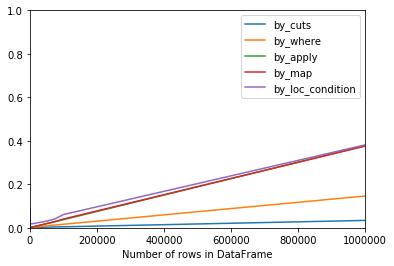

In [45]:
# Time took by type of func
x = showDF.plot.line()
x.set_xlim(250, 1000000)
x.set_ylim(0, 1.0)
x

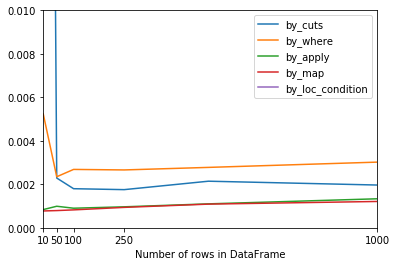

In [26]:
# Closer look @ small tables
x = showDF.plot.line()
x.set_xlim(8, 1001)
x.set_ylim(0, 0.01)
x.xaxis.set_ticks([10, 50, 100, 250, 1000])
x